<a href="https://colab.research.google.com/github/ortizfram/Microsoft_Stock_Forecasting_with_LSTMs/blob/main/Microsoft_Stock_Forecasting_with_LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dataset : https://finance.yahoo.com/quote/MSFT/history

In [2]:
import pandas as pd 

df = pd.read_csv('/content/MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-24,272.510010,295.160004,271.519989,294.589996,291.728027,56989700
1,2022-02-25,295.140015,297.630005,291.649994,297.309998,294.421600,32546700
2,2022-02-28,294.309998,299.140015,293.000000,298.790009,295.887238,34627500
3,2022-03-01,296.399994,299.970001,292.149994,294.950012,292.084564,31217800
4,2022-03-02,295.359985,301.470001,293.700012,300.190002,297.273651,31873000
...,...,...,...,...,...,...,...
246,2023-02-16,264.019989,266.739990,261.899994,262.149994,262.149994,29603600
247,2023-02-17,259.390015,260.089996,256.000000,258.059998,258.059998,29979600
248,2023-02-21,254.479996,255.490005,251.589996,252.669998,252.669998,28397400
249,2023-02-22,254.089996,254.339996,250.339996,251.509995,251.509995,22491100


In [3]:
# Clean unnecessary columns
df = df[["Date","Close"]]

df

,Date,Close
0,2022-02-24,294.589996
1,2022-02-25,297.309998
2,2022-02-28,298.790009
3,2022-03-01,294.950012
4,2022-03-02,300.190002
...,...,...
246,2023-02-16,262.149994
247,2023-02-17,258.059998
248,2023-02-21,252.669998
249,2023-02-22,251.509995


In [4]:
df["Date"].dtype

dtype('O')

In [5]:
# Date column is Object Type so, we'll pass it as datetime Obj
#   so it it's easier to manage and index those dates 
df["Date"] = pd.to_datetime(df["Date"])

df["Date"].head()

<ipython-input-5-a0d5502409b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])


0   2022-02-24
1   2022-02-25
2   2022-02-28
3   2022-03-01
4   2022-03-02
Name: Date, dtype: datetime64[ns]

In [6]:
df["Date"].dt.year

0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
246    2023
247    2023
248    2023
249    2023
250    2023
Name: Date, Length: 251, dtype: int64

In [7]:
# Change index column to Date column, and delete original column
#   .pop() => removes the item at the given index from the list and returns the removed item.
df.index = df.pop("Date")

df.head()

,Close
Date,
2022-02-24,294.589996
2022-02-25,297.309998
2022-02-28,298.790009
2022-03-01,294.950012
2022-03-02,300.190002


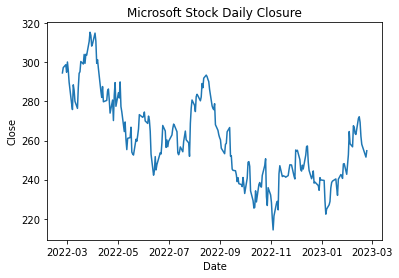

In [9]:
# Plotting daily clousure raw
import matplotlib.pyplot as plt

plt.plot(df.index, df["Close"])
plt.title("Microsoft Stock Daily Closure")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()